In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
df = pd.read_csv('./seguros.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1333 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.670090,1.094918,13270.422265
std,14.049960,6.101179,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


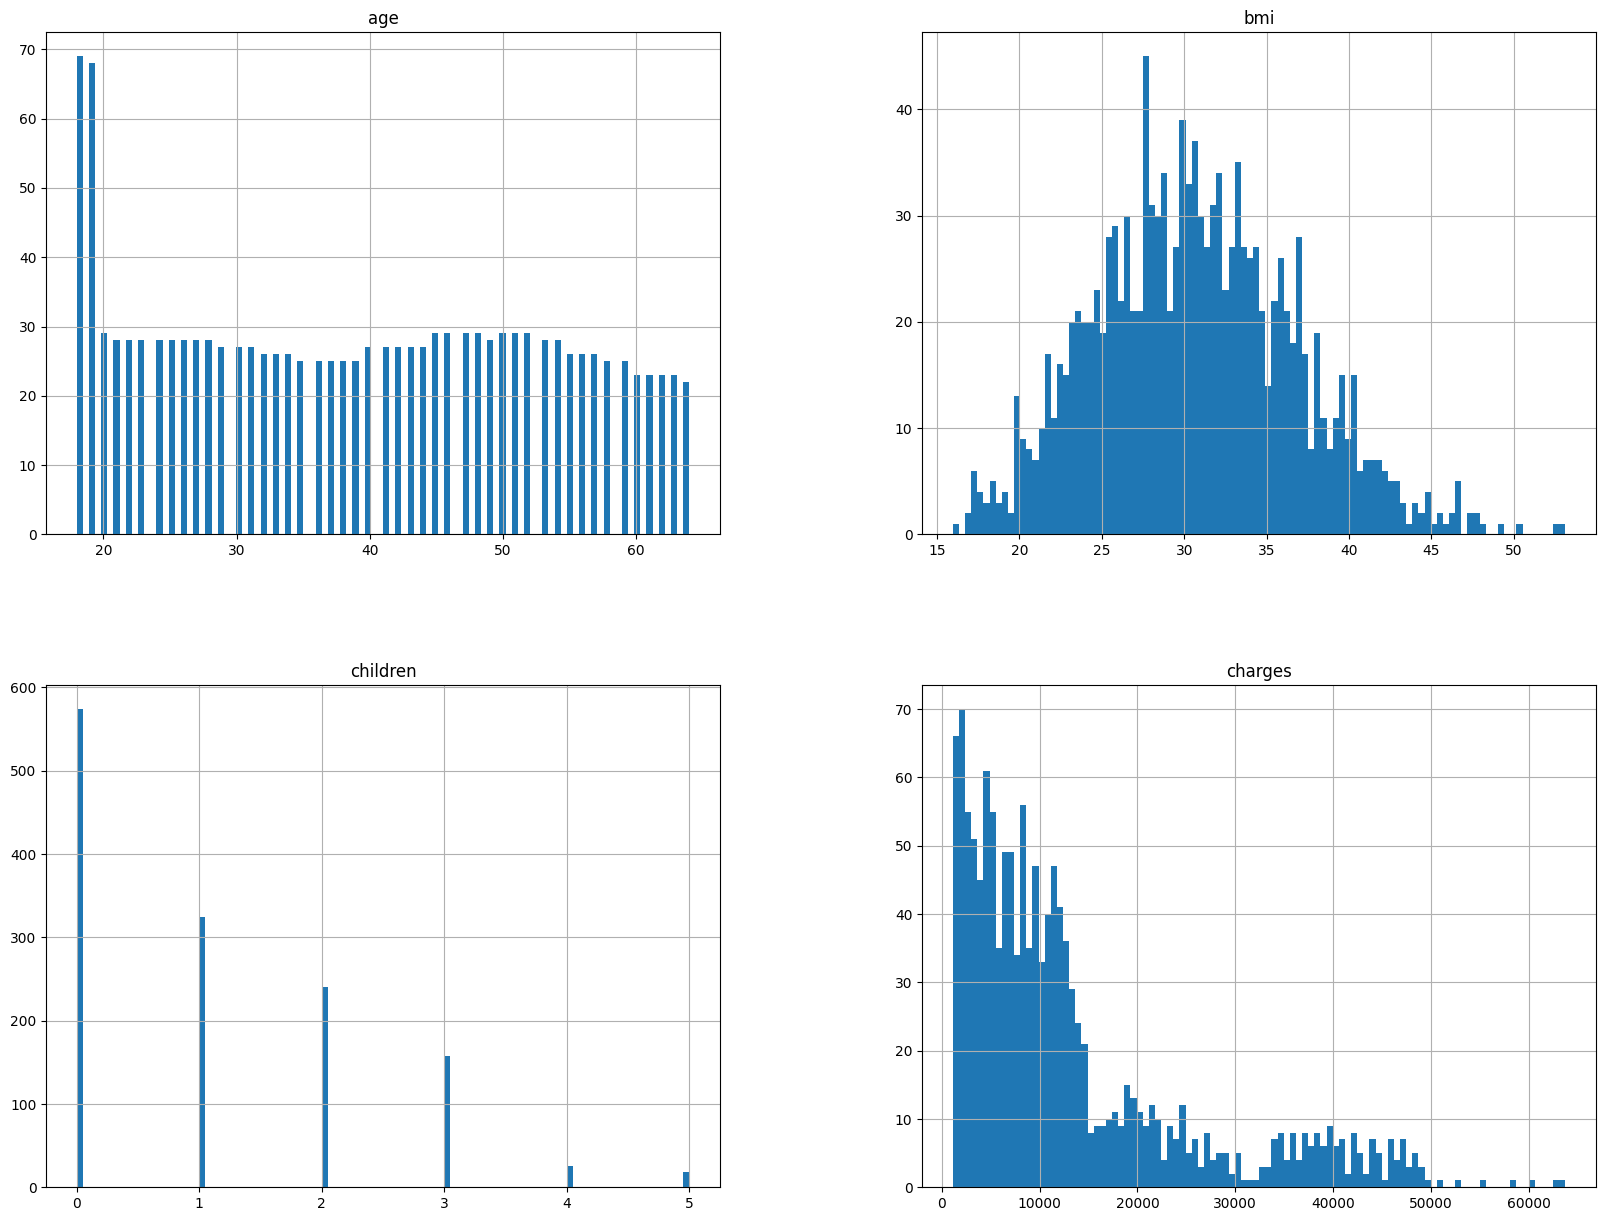

In [7]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

In [8]:
# Separando x e y
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
# Identificando quantidade de NAN
df.isna().sum()

age         0
sex         5
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.query('sex.isnull() or bmi.isnull()', engine='python')

,age,sex,bmi,children,smoker,region,charges
5,31,NaN,25.740,0,no,southeast,3756.62160
25,59,female,NaN,3,no,southeast,14001.13380
141,26,NaN,32.490,1,no,northeast,3490.54910
441,33,female,NaN,0,yes,southwest,37079.37200
461,42,NaN,30.000,0,yes,southwest,22144.03200
761,23,male,NaN,1,no,southwest,2416.95500
845,60,NaN,32.450,0,yes,southeast,45008.95550
1113,28,female,NaN,3,no,northwest,5312.16985
1282,18,female,NaN,0,yes,northeast,14283.45940
1324,31,NaN,25.935,1,no,northwest,4239.89265


In [11]:
#caso seja necessário rodar uma fórmula e substituir valores em colunas
df.eval("overweight = bmi > 25", inplace=True)

In [12]:
#caso seja necessário eliminar colunas
df.drop("bmi", axis='columns')

,age,sex,children,smoker,region,charges,overweight
0,19,female,0,yes,southwest,16884.92400,True
1,18,male,1,no,southeast,1725.55230,True
2,28,male,3,no,southeast,4449.46200,True
3,33,male,0,no,northwest,21984.47061,False
4,32,male,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...
1333,50,male,3,no,northwest,10600.54830,True
1334,18,female,0,no,northeast,2205.98080,True
1335,18,female,0,no,southeast,1629.83350,True
1336,21,female,0,no,southwest,2007.94500,True


In [13]:
#caso seja necessário reordenar colunas
columns_titles = ["age","sex","overweight","children","smoker","region","charges"]
df = df.reindex(columns=columns_titles)

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'female'